# Exploratory Data Analysis (EDA) with Feature Engineering for LoL stats
##### Sample: ~4500 games with 4+ S6 Plat players
##### The hashtags make the headings larger or smaller but I don't understand how they work yet.
##### My brother (A data scientist!) helped me put this analysis together.  He did most of the work.

In [130]:
#I think this is for histograms
%matplotlib inline

#'pd', 'np', and 'plt' are standard notations in the data science industry
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [14]:
#Gather the files in the 'matchData' subdirectory.  They're all JSON files containing stats for an individual LoL match.
matches = os.listdir('matchData')

### Trying to figure out how to load in json

In [97]:
matches[0:5]

['match-2536802224.json',
 'match-2536802235.json',
 'match-2536802243.json',
 'match-2536802332.json',
 'match-2536802336.json']

In [103]:
#Assign relevant dimensions.
tot_dmg_taken_list = []
tot_dmg_dealt_list = []
dmg_mitig_list = []
gld_list = []
win_list = []
chmp_list = []
game_id = []

#Cycle through all matches in the directory, and add JSON data to our data dimensions (I don't think they're called data dimensions)
#To make this, we did each step piece by piece and copied all the cells together below, once we got it working.
for match in matches:
    with open('matchData/'+match) as f:
        match_json = json.load(f)
        for player in range(num_players):
            tot_dmg_taken_list.append(match_json['participants'][player]['stats']['totalDamageTaken'])
            tot_dmg_dealt_list.append(match_json['participants'][player]['stats']['totalDamageDealt'])
            dmg_mitig_list.append(match_json['participants'][player]['stats']['damageSelfMitigated'])
            gld_list.append(match_json['participants'][player]['stats']['goldEarned'])
            win_list.append(match_json['participants'][player]['stats']['win'])
            chmp_list.append(match_json['participants'][player]['championId'])
            game_id.append(match_json['gameId'])

In [104]:
#Define fields for the Pandas DataFrame.
df = pd.DataFrame(
                  {'game_id':game_id,
                   'champ_id':chmp_list,
                   'tot_dmg_tkn':tot_dmg_taken_list,
                   'tot_dmg_dlt':tot_dmg_dealt_list,
                   'dmg_mitig':dmg_mitig_list,
                   'gold':gld_list,
                   'win':win_list}
                )

In [107]:
#Shape tells you the dimensions of the object.  
#Also, I can get documentation for class methods instantly with a keyboard shortcut but I don't know how.
df.shape

(62070, 7)

In [108]:
#'DataFrame.head()' lets you preview the first few entries of a large object.
df.head()

,champ_id,dmg_mitig,game_id,gold,tot_dmg_dlt,tot_dmg_tkn,win
0,86,29548,2536802224,10459,77655,18324,True
1,64,19682,2536802224,9529,113023,24723,True
2,201,13760,2536802224,8495,22933,16113,True
3,85,17846,2536802224,14383,142162,25269,True
4,69,6136,2536802224,8921,74442,13178,True


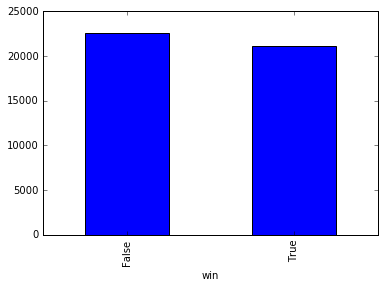

In [116]:
#Group Win/Loss with Total Damage taken.
df.groupby('win').mean()['tot_dmg_tkn'].plot(kind='bar')

In [129]:
#Here's a preview for our completed dataframe.
df.groupby(['champ_id','win']).mean().head()

dmg_mitig       game_id          gold    tot_dmg_dlt  \
champ_id win                                                              
1        False   8203.399103  2.536917e+09  10387.255605   95553.596413   
         True    7112.783920  2.536915e+09  12435.894472  107795.502513   
2        False  30337.221239  2.536917e+09  10260.938053  125529.283186   
         True   31096.910714  2.536913e+09  12572.241071  147482.946429   
3        False  38653.248996  2.536915e+09   9749.425703  104731.349398   

                 tot_dmg_tkn  
champ_id win                  
1        False  18482.784753  
         True   16329.175879  
2        False  32046.309735  
         True   32398.214286  
3        False  24226.176707

In [120]:
#Here's the win/loss stats for Garen (Champion 86)
df[df['champ_id']==86].groupby('win').mean()

,champ_id,dmg_mitig,game_id,gold,tot_dmg_dlt,tot_dmg_tkn
win,,,,,,
False,86,32992.493506,2.536910e+09,10214.688312,109636.623377,27716.818182
True,86,33580.462963,2.536925e+09,12743.722222,132583.166667,25953.074074


(array([  1.,   1.,   8.,   6.,  14.,  17.,  22.,  18.,   6.,   7.]),
 array([-3.17211673, -2.6439614 , -2.11580607, -1.58765074, -1.05949542,
        -0.53134009, -0.00318476,  0.52497056,  1.05312589,  1.58128122,
         2.10943654]),
 <a list of 10 Patch objects>)

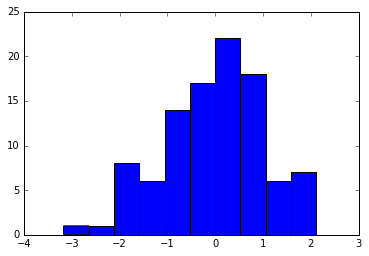

In [131]:
# A histogram of random numbers.
plt.hist(np.random.randn(100))

(array([ 4.,  0.,  0.,  0.,  2.,  2.,  3.,  5.,  6.,  5.,  8.,  4.,  5.,
         3.,  6.,  7.,  4.,  4.,  4.,  5.]),
 array([   656. ,   1465.1,   2274.2,   3083.3,   3892.4,   4701.5,
          5510.6,   6319.7,   7128.8,   7937.9,   8747. ,   9556.1,
         10365.2,  11174.3,  11983.4,  12792.5,  13601.6,  14410.7,
         15219.8,  16028.9,  16838. ]),
 <a list of 20 Patch objects>)

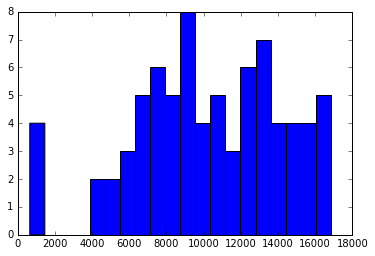

In [136]:
#A histogram of lost Garen games showing gold accumulated.
plt.hist(df[(df['champ_id']==86)&(df['win']==False)]['gold'].values,bins=20)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  5.,  3.,  2.,
         8.,  4.,  9.,  6.,  4.,  4.,  4.]),
 array([  1060.  ,   1875.75,   2691.5 ,   3507.25,   4323.  ,   5138.75,
          5954.5 ,   6770.25,   7586.  ,   8401.75,   9217.5 ,  10033.25,
         10849.  ,  11664.75,  12480.5 ,  13296.25,  14112.  ,  14927.75,
         15743.5 ,  16559.25,  17375.  ]),
 <a list of 20 Patch objects>)

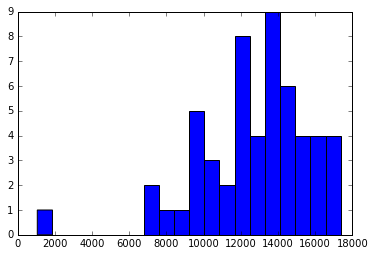

In [137]:
#A histogram of won Garen games showing gold accumulated.  Note there's more gold (Longer games)
plt.hist(df[(df['champ_id']==86)&(df['win']==True)]['gold'].values,bins=20)

In [178]:
#Watch out for pivots!  They're really confusing!  Reset Index does something important but I'm not sure what.
win_loss = df.groupby(['champ_id','win']).count()['game_id'].reset_index().pivot(index='champ_id',columns='win')['game_id']

In [185]:
df.groupby(['champ_id','win']).count().head()

dmg_mitig  game_id  gold  tot_dmg_dlt  tot_dmg_tkn
champ_id win                                                      
1        False        223      223   223          223          223
         True         199      199   199          199          199
2        False        113      113   113          113          113
         True         112      112   112          112          112
3        False        249      249   249          249          249

In [198]:
df.groupby(['champ_id','win']).count()['game_id'].head()

champ_id  win  
1         False    223
          True     199
2         False    113
          True     112
3         False    249
Name: game_id, dtype: int64

In [187]:
#invoking ".values" uses numpy array, which is lower level and therefore faster 
win_loss[True].values

array([ 199,  112,  243,  247,  135,   14,  149,  220,   93,  143,  297,
        163,   27,  103,  104,  290,  171,  469,  462,  368,  244,  401,
        298,  405,  315,  146,   55,  142,  519,   63,   81,  133,  110,
        251,  165,   40,  293,  288,  182,  494,  279,  215,  231,   58,
        127,  144,  134,  911,  487,  135,  212,   94,  136,  392,  508,
        307,  508,  138,  301,  672,  405,  121,  128,   37,   91,  114,
        135,   48,   87,  521,  271,  187,   58,   58,  141,  118,   54,
        199,  239,   82,  552,   71,  176,  209,  121,   45,  492,  181,
        202,   51,   68,  190,   80,  133,  134,  299,  149,  361,  363,
        104,  383,  320,  211,   63,   84,   48,  254,   57,  192,  191,
        200,  411,  174,  214,  116,  269,  957,   96,  281,  142,  722,
        294,  146,  292,  179,   66,  357,   20, 1053,   73,  282,   80,
         81,  307,  358,  364], dtype=int64)

In [189]:
#'%%time' shows execution time, which could be useful for optimizing calculations.
%%time
win_loss[True].values/(win_loss[True].values+win_loss[False].values)

Wall time: 1e+03 µs


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [209]:
float(2)


2.0

In [207]:
#win_loss[True] = win_loss[True].as_type(float)

#,False]] = win_loss[[True,False]].as_type(float)

In [208]:
#win_loss[True].astype(float)

In [210]:
#List Comprehension (We made a compromise here, a "Lazy" solution because we had problems with Pivot formatting)
win_loss['WL_ratio'] = [float(val) for val in win_loss[True].values]/(win_loss[True].values+win_loss[False].values)

In [211]:
#Win/Loss percent over the sample by champion.
#Note how much work it took to set up a Win/Loss ratio.
#However, vectorizing results can result in significant computational savings!
#I could set up a binomial confidence interval to get more meaningful results!
win_loss.sort_values('WL_ratio',ascending=False)

win,False,True,WL_ratio
champ_id,,,
133,33,48,0.592593
20,257,368,0.588800
55,154,212,0.579235
266,50,66,0.568966
34,196,251,0.561521
80,212,271,0.561077
57,108,136,0.557377
62,112,138,0.552000
15,85,104,0.550265


In [215]:
wl2 = win_loss.reset_index()

(array([  1.,   2.,   7.,   9.,  27.,  37.,  29.,  13.,   8.,   3.]),
 array([ 0.36986301,  0.39213597,  0.41440893,  0.43668189,  0.45895485,
         0.4812278 ,  0.50350076,  0.52577372,  0.54804668,  0.57031963,
         0.59259259]),
 <a list of 10 Patch objects>)

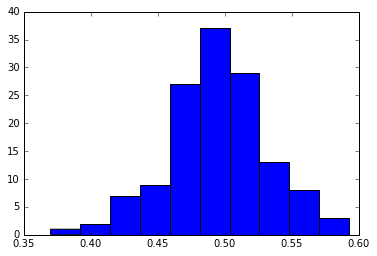

In [221]:
plt.hist(win_loss['WL_ratio'].values)

In [222]:
#Standard Deviation for Win/Loss ration for each champion (They are unweighted for play % though!)
np.std(win_loss['WL_ratio'].values)

0.03729817876744209

In [216]:
#Garen's got a pretty low win rate.
wl2[wl2['champ_id']==86]

win,champ_id,False,True,WL_ratio
76,86,77,54,0.412214


### A bunch of preliminary calculations used for creating the control loop used above.

In [21]:
# works!
with open('matchData/'+matches[0]) as f:
    test = json.load(f)
    #for line in f:
    #    json.load(line)

In [96]:
#test

In [95]:
#test.keys()

In [55]:
game_id = [test['gameId']]*10
champ_id = test['participants'][0]['championId']

86

In [64]:
test['participants'][2]['masteries']

[{u'masteryId': 6212, u'rank': 5},
 {u'masteryId': 6221, u'rank': 1},
 {u'masteryId': 6232, u'rank': 5},
 {u'masteryId': 6243, u'rank': 1},
 {u'masteryId': 6252, u'rank': 5},
 {u'masteryId': 6263, u'rank': 1},
 {u'masteryId': 6311, u'rank': 5},
 {u'masteryId': 6322, u'rank': 1},
 {u'masteryId': 6332, u'rank': 5},
 {u'masteryId': 6342, u'rank': 1}]

In [94]:
#test['participants'][0]

In [35]:
test['participants'][0]['masteries'][0]

{u'masteryId': 6114, u'rank': 5}

In [78]:
num_players = 10

In [90]:
tot_dmg_taken_list = []
tot_dmg_dealt_list = []
dmg_mitig_list = []
gld_list = []
win_list = []
chmp_list = []
game_id = []

In [91]:
for player in range(num_players):
    tot_dmg_taken_list.append(test['participants'][player]['stats']['totalDamageTaken'])
    tot_dmg_dealt_list.append(test['participants'][player]['stats']['totalDamageDealt'])
    dmg_mitig_list.append(test['participants'][player]['stats']['damageSelfMitigated'])
    gld_list.append(test['participants'][player]['stats']['goldEarned'])
    win_list.append(test['participants'][player]['stats']['win'])
    chmp_list.append(test['participants'][player]['championId'])
    game_id.append(test['gameId'])

In [89]:
test['gameId']

2536802224L

In [77]:
tot_dmg_taken_list

[18324, 24723, 16113, 25269, 13178, 30744, 17175, 11880, 14976, 16339]

In [92]:
df = pd.DataFrame(
                  {'game_id':game_id,
                   'champ_id':chmp_list,
                   'tot_dmg_tkn':tot_dmg_taken_list,
                   'tot_dmg_dlt':tot_dmg_dealt_list,
                   'dmg_mitig':dmg_mitig_list,
                   'gold':gld_list,
                   'win':win_list}
                )

In [93]:
df

,champ_id,dmg_mitig,game_id,gold,tot_dmg_dlt,tot_dmg_tkn,win
0,86,29548,2536802224,10459,77655,18324,True
1,64,19682,2536802224,9529,113023,24723,True
2,201,13760,2536802224,8495,22933,16113,True
3,85,17846,2536802224,14383,142162,25269,True
4,69,6136,2536802224,8921,74442,13178,True
5,31,21255,2536802224,8256,100410,30744,False
6,238,8757,2536802224,9300,94978,17175,False
7,37,5960,2536802224,5739,13533,11880,False
8,81,7620,2536802224,8184,77565,14976,False
9,126,11032,2536802224,8358,83903,16339,False


In [73]:
test['participants'][0]['stats']['totalDamageTaken']
test['participants'][0]['stats']['totalDamageDealt']
test['participants'][0]['stats']['damageSelfMitigated']
test['participants'][0]['stats']['goldEarned']
test['participants'][0]['stats']['win']


True

In [72]:
test['participants'][0]['stats']

{u'assists': 6,
 u'champLevel': 14,
 u'combatPlayerScore': 0,
 u'damageDealtToObjectives': 4026,
 u'damageDealtToTurrets': 4026,
 u'damageSelfMitigated': 29548,
 u'deaths': 1,
 u'doubleKills': 1,
 u'firstBloodAssist': False,
 u'firstBloodKill': False,
 u'firstInhibitorAssist': False,
 u'firstInhibitorKill': False,
 u'firstTowerAssist': False,
 u'firstTowerKill': False,
 u'goldEarned': 10459,
 u'goldSpent': 8825,
 u'inhibitorKills': 0,
 u'item0': 1054,
 u'item1': 3143,
 u'item2': 3047,
 u'item3': 1031,
 u'item4': 3071,
 u'item5': 1028,
 u'item6': 3340,
 u'killingSprees': 1,
 u'kills': 7,
 u'largestCriticalStrike': 0,
 u'largestKillingSpree': 6,
 u'largestMultiKill': 2,
 u'longestTimeSpentLiving': 1308,
 u'magicDamageDealt': 1715,
 u'magicDamageDealtToChampions': 1715,
 u'magicalDamageTaken': 3698,
 u'neutralMinionsKilled': 1,
 u'neutralMinionsKilledEnemyJungle': 1,
 u'neutralMinionsKilledTeamJungle': 0,
 u'objectivePlayerScore': 0,
 u'participantId': 1,
 u'pentaKills': 0,
 u'physicalDam

In [36]:
!ls matchData | head

match-2536802224.json
match-2536802235.json
match-2536802243.json
match-2536802332.json
match-2536802336.json
match-2536802343.json
match-2536802345.json
match-2536802348.json
match-2536802369.json
match-2536802373.json


ls: write error
